# Importing Modules

In [21]:
# importing the relevant modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

from random import randint
num = randint(0,9999)

# Loading Data 

Below I will be loading the training and test data of the MNIST handwritten numbers into training and test dataframes. The used data set was downloaded from kaggle to make it easier to carryout the task at hand.

In [2]:
# loading training data into a dataframe
train_data = pd.read_csv('mnist_train.csv')

In [3]:
train_data.head() # first five rows

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape # training data dimensions

(60000, 785)

In [5]:
# getting the number of missing data points per column
missing_datapoints = train_data.isnull().sum()

# number of missing points in the columns
missing_datapoints = missing_datapoints[missing_datapoints != 0]

missing_datapoints

Series([], dtype: int64)

The training dataset has 60000 rows and 785 columns, the data set does not contain any rows with missing values. The test data set has 10000 rows and 785 columns and it also does not have any missing values in its rows. Since both data sets do not have empty values, imputation will fortunatley not be necessary. 

In [6]:
# loading test data into a dataframe
test_data = pd.read_csv('mnist_test.csv')

In [7]:
test_data.head() # first five rows

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test_data.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_data.shape # test data dimensions

(10000, 785)

In [9]:
# getting the number of missing data points per column
missing_datapoints = test_data.isnull().sum()

# number of missing points in the columns
missing_datapoints = missing_datapoints[missing_datapoints != 0]

missing_datapoints

Series([], dtype: int64)

# Variables

Below I will be splitting the training data into the train set and the development set. We already have the test set seperate from the training set. The need for a development set is to see whether the model is learning general patterns from the trainig data.This helps with spotting and possibly remedying under- or overfitting in the model.The test data set is used at the end to test the model on unseen data.

Below I also view a random digit from the test set and one from the development set, this is to just see how the digits (images) look like.

In [10]:
# features of the test data
X_test = test_data.iloc[:,1:].values

# test labels
y_test = test_data['label']

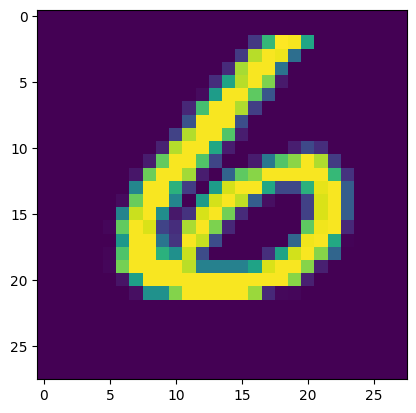

In [11]:
# viewing a random number on the test features
a_digit = X_test[num].reshape(28,28)

plt.imshow(a_digit); # showing digit 

In [12]:
# features of the training data
X = train_data.iloc[:,1:].values

# lables of the train data
y = train_data['label']

# splitting training data into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X,y, test_size=10000) 

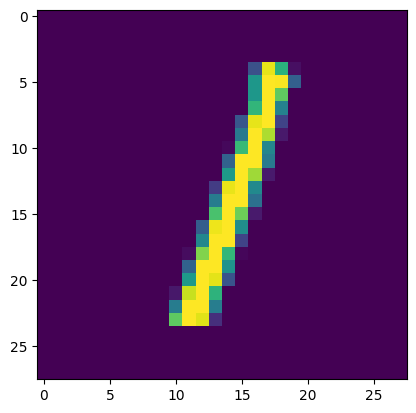

In [13]:
# viewing a random number on the development set
a_digit = X_dev[num].reshape(28,28)

plt.imshow(a_digit); # showing digit 

# Random Forest Classifier

Below is the model using the random forest classifier. The chosen parameter for tuning is the max_depth, which is the maximum depth of the tree. If max_depth is not specified it is by default equal to none which then means the nodes are expanded until all leaves are pure. This could lead to overfitting.

The max_depth parameter will be fine tuned using GridSearchCV which will choose the best max_depth for optimal performance for the model. Hyperparameter tuning helps with choosing the best value for the max_depth without having to do it by trial and error.

In [14]:
# function to tune max_depth using GridSearchCV
def depth_tuning(model,param, cv):
    
    # random forest GridSearchCV model
    GSCV = GridSearchCV(estimator = model, param_grid = param, cv = cv)
    
    # fitting the model
    GSCV.fit(X_train,y_train);
    
    depth = GSCV.best_params_ # getting tuned parameter
    
    return depth # returning tuned parameter

The fine tuning of the max_depth parameter will be done using the above function. The accuracy of the model is also displayed below. 

In [15]:
# random forest model
rf_model = RandomForestClassifier()

# parameter for tuning
params_grid = {
    
    'max_depth': [2,4,6,9,3,5,8,7]
}

# getting the tuned max_depth 
depth = depth_tuning(rf_model,params_grid,3)

print(depth)

{'max_depth': 9}


In [16]:
depth = depth['max_depth'] # getting tuned depth

# random forest model
forest = RandomForestClassifier(max_depth = depth)

# fitting model
forest.fit(X_train, y_train)

# displaying accuracy of model
print(f"Accuracy random forest at max_depth of {depth}:",forest.score(X_dev, y_dev))

Accuracy random forest at max_depth of 9: 0.9372


# Confusion Matrix

Below is the display of the confusion matrix of the model which aims to expalin the performance of the model on the test data set.

In [17]:
# model predictions
y_pred = forest.predict(X_test)

# confusion matrix
confusion = confusion_matrix(y_test,y_pred)

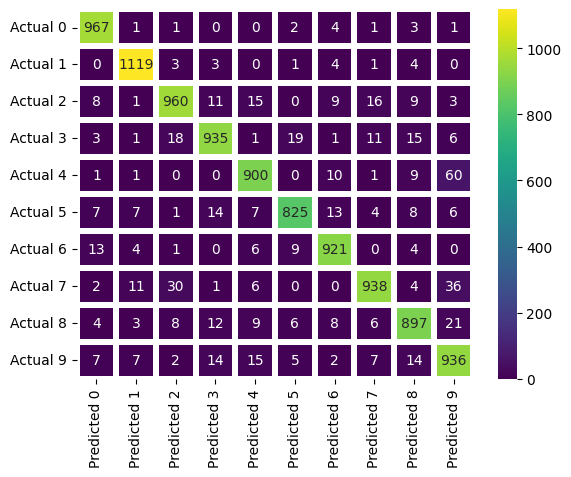

In [18]:
# displaying the heatmap of the confusion matrix
labels = unique_labels(y_test)
columns = [f'Predicted {label}' for label in labels]
index = [f'Actual {label}' for label in labels]

confusion_df = pd.DataFrame(confusion, columns = columns, index = index )

sns.heatmap(confusion_df, cmap = 'viridis', annot=True, fmt="d", linewidth=4);

From the confusion matrix above, we can conclude that the model struggles the most with predicting correctly the numbers 9, 8, 3 and 4.

# Classification Report

Below is the report on the accuracy, precision, recall, and f1-score of the model.

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.94      0.93      0.93      1010
           4       0.94      0.92      0.93       982
           5       0.95      0.92      0.94       892
           6       0.95      0.96      0.95       958
           7       0.95      0.91      0.93      1028
           8       0.93      0.92      0.92       974
           9       0.88      0.93      0.90      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

